In [68]:
import pandas as pd
import numpy as np

# Read Data
df = pd.DataFrame()
df = pd.read_csv('Fifa_world_cup_matches.csv')
df.head()



,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [6]:
# Slicing data
# Possesion criteria

pos = df[['team1','team2','possession team1','possession team2']]
pos.head(15)

#Ver posesion total de pelota
#pos = df[['team1','team2','possession team1','possession team2','possession in contest']]
#pos.head(17)


,team1,team2,possession team1,possession team2
0,QATAR,ECUADOR,42%,50%
1,ENGLAND,IRAN,72%,19%
2,SENEGAL,NETHERLANDS,44%,45%
3,UNITED STATES,WALES,51%,39%
4,ARGENTINA,SAUDI ARABIA,64%,24%
5,DENMARK,TUNISIA,55%,33%
6,MEXICO,POLAND,54%,31%
7,FRANCE,AUSTRALIA,56%,35%
8,MOROCCO,CROATIA,32%,57%
9,GERMANY,JAPAN,65%,22%


In [51]:
#creo dos df del original
pos1 = pos[['team1','possession team1']]
pos2 = pos[['team2','possession team2']]

#renombro columnas y hago el join
pos1.rename(columns= {"team1":"team","possession team1":"possession"},inplace=True)
pos2.rename(columns= {"team2":"team","possession team2":"possession"},inplace=True)

team_pos = pd.concat([pos1, pos2], ignore_index=True, sort=False)
team_pos.head(40)



C:\Users\Gaspar Serra\AppData\Local\Temp\ipykernel_20408\710628887.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos1.rename(columns= {"team1":"team","possession team1":"possession"},inplace=True)
C:\Users\Gaspar Serra\AppData\Local\Temp\ipykernel_20408\710628887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos2.rename(columns= {"team2":"team","possession team2":"possession"},inplace=True)


,team,possession
0,QATAR,42%
1,ENGLAND,72%
2,SENEGAL,44%
3,UNITED STATES,51%
4,ARGENTINA,64%
5,DENMARK,55%
6,MEXICO,54%
7,FRANCE,56%
8,MOROCCO,32%
9,GERMANY,65%


In [52]:
#Elimino el signo %
team_pos["possession"] = team_pos["possession"].str.strip("%")
#Convierto en float
team_pos["possession"]=team_pos["possession"].astype(float)
team_pos


,team,possession
0,QATAR,42.0
1,ENGLAND,72.0
2,SENEGAL,44.0
3,UNITED STATES,51.0
4,ARGENTINA,64.0
...,...,...
123,FRANCE,36.0
124,CROATIA,54.0
125,MOROCCO,55.0
126,MOROCCO,45.0


<AxesSubplot: xlabel='team'>

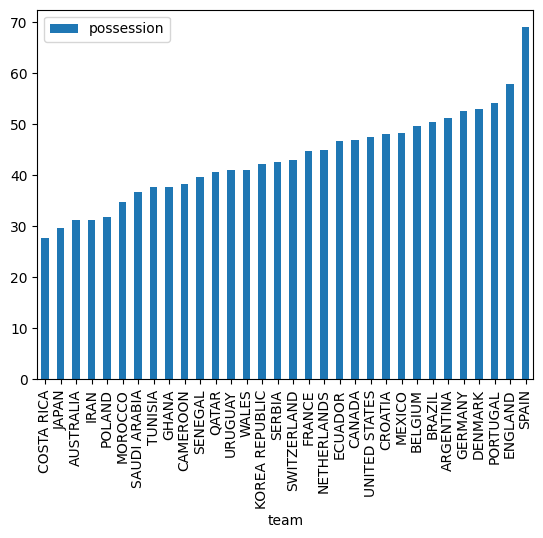

In [55]:
#df_test = team_pos[["team","possession"]]
#agrupo los equipos y calculo la media
df_grp = team_pos.groupby(["team"],as_index=True).mean()

#ordeno los valores por posesion y grafico
df_grp.sort_values(by=['possession'],inplace=True)
df_grp.plot.bar()

In [91]:
# Slicing data
# Pressure criteria

pres1 = df[['team1','defensive pressures applied team1','forced turnovers team2']]
pres2 = df[['team2','defensive pressures applied team2','forced turnovers team1']]

pres1.rename(columns= {"team1":"team","defensive pressures applied team1":"presion","forced turnovers team2":"perdidas_adversario"},inplace=True)
pres2.rename(columns= {"team2":"team","defensive pressures applied team2":"presion","forced turnovers team1":"perdidas_adversario"},inplace=True)

pres = pd.concat([pres1, pres2], ignore_index=True, sort=False)

#efectividad de presion por partido
pres['efectividad_presion'] = pres.apply(lambda row: row.presion /row.perdidas_adversario, axis = 1)
pres.sort_values(by=['efectividad_presion']).head(30)


C:\Users\Gaspar Serra\AppData\Local\Temp\ipykernel_20408\1876972642.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pres1.rename(columns= {"team1":"team","defensive pressures applied team1":"presion","forced turnovers team2":"perdidas_adversario"},inplace=True)
C:\Users\Gaspar Serra\AppData\Local\Temp\ipykernel_20408\1876972642.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pres2.rename(columns= {"team2":"team","defensive pressures applied team2":"presion","forced turnovers team1":"perdidas_adversario"},inplace=True)


,team,presion,perdidas_adversario,efectividad_presion
106,SPAIN,150,85,1.764706
100,DENMARK,161,90,1.788889
122,PORTUGAL,165,88,1.875000
9,GERMANY,164,87,1.885057
16,WALES,161,84,1.916667
1,ENGLAND,139,72,1.930556
4,ARGENTINA,163,80,2.037500
102,ARGENTINA,141,67,2.104478
118,SPAIN,217,100,2.170000
10,SPAIN,185,76,2.434211


In [85]:
#efectividad de presion por partido cuando se presiona mas de 250 veces
presF = pres.where(pres.presion > 250)
presF.sort_values(by=['efectividad_presion']).head(30)

,team,presion,perdidas_adversario,efectividad_presion
112,UNITED STATES,256.0,101.0,2.534653
63,ARGENTINA,280.0,104.0,2.692308
27,SPAIN,275.0,101.0,2.722772
124,CROATIA,260.0,85.0,3.058824
116,CROATIA,308.0,100.0,3.080000
80,IRAN,276.0,89.0,3.101124
108,URUGUAY,293.0,92.0,3.184783
82,ECUADOR,279.0,85.0,3.282353
46,SERBIA,276.0,82.0,3.365854
84,AUSTRALIA,273.0,81.0,3.370370


<AxesSubplot: xlabel='team'>

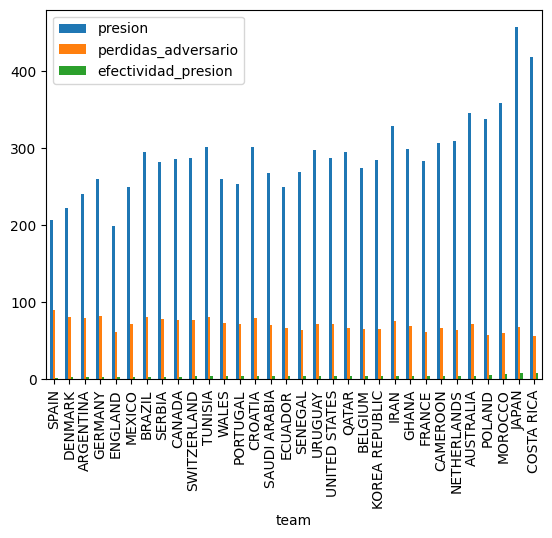

In [94]:

#agrupo los equipos y calculo la media
df_grp2 = pres[['team','efectividad_presion']]
df_grp2
df_grp2 = pres.groupby(["team"],as_index=True).mean()

#ordeno los valores por posesion y grafico
df_grp2.sort_values(by=['efectividad_presion'],inplace=True)
df_grp2.plot.bar()